###  Food consumption 


The data food-consumption.csv contains various countries around the world and their consumption for 36 food items, such as Alcoholic, Animal Fat, Animal Products, Eggs, and others The goal is to perform PCA analysis on the data, i.e., find a way to perform linear combinations of features across all 36 food-item consumptions, for each country. If we extract two principal components, that means we use two singular vectors that correspond to the largest singular values of the data matrix, in combining features. _**You will need to implement PCA by writing your own code.**_



### Question 1.

Write down the set-up of PCA for this setting. Explain how the data matrix is set-up in this case (e.g., each dimension of the matrix correspond to what.) Explain in words how PCA is performed in this setting.

### <span style="color:red" >Answer)</span>

The purpose of PCA is primarily to find a low-dimensional representation of data sets with the variation of data remaining at the original level as much as possible. The fundamental lying behind this algorithm is that we place more weights on some variables over others whereas the weight is measured by the amount that the observations vary along each dimension.  Each of the newly generated dimensions, therefore, represents a linear combination of variables by computing values times its weight while retaining most of the information present in the original data.

In [460]:
import pandas as pd
import numpy as np

In [461]:
food=pd.read_csv("dataset_food.csv")

#### <span style="color:blue">comment></span>

We only include the entries holing all the information across the features

In [462]:
food=food[food.notnull().all(axis=1)]
food=food.iloc[:,:23]
food.head()


,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,0.0700,0.2953,0.0574,0.8802,0.3078,1.3489,0.0,0.0770,0.5345,6.7642
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,0.9377,0.2380,0.0008,1.8096,0.1055,1.5367,0.0,0.1515,0.3261,11.7753
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,0.3493,0.4783,0.0557,4.1340,0.2216,1.8342,0.0,0.1152,1.0310,11.6484
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,0.4186,0.6507,0.0009,18.1102,0.0508,1.8495,0.0,0.0061,0.6463,2.3041
5,Argentina,4.2672,0.2234,19.3454,0.0,8.4102,0.9979,0.4693,6.0435,7.0421,...,0.0116,0.0528,0.0122,3.0420,0.4378,3.0536,0.0,0.0200,0.9541,4.3503


#### <span style="color:blue">comment></span>

For convenience in data analysis, we need to take one further step by resetting our index to country.

In [463]:
food.set_index('Country',inplace=True)

In [464]:
def PCA(data,k=2):
    #compute the mean
    mean=data.mean(axis=0)
    #compute variance
    cov=data.cov()
    
    #compute the eigen vectors and eigen values of the covariance matrix
    val,vec=np.linalg.eigh(cov)
    
    #sort the eigen vectors according to the sizse of eigen values in decreasing order
    sorted_val=val[np.argsort(-val)]
    sorted_vec=vec[np.argsort(-val)]
    
    #Before taking the dot product of data and mean, normalizing data is essential
    normalized=data-mean
    
    #compute the newly generated features calleed the principal component
    components=normalized.dot(sorted_vec)
    
    #return the first k-th components
    vecs=sorted_vec[:,:k]
    components=components.iloc[:,:k]/np.sqrt(sorted_val[:k])
    return vecs,components

### Question 2.

Suppose we aim to find top k principal components. Write down the mathematical opti- mization problem involved for solving this problem. Explain the procedure to find the top k principal components in performing PCA.



### <span style="color:red"> Answer) 
    
Suppose we aim to find top k principal components. Write down the mathematical opti- mization problem involved for solving this problem. Explain the procedure to find the top k principal components in performing PCA.

First,we have nth number of column vectors in our dataset,X.

$\{x_1,x_2,x_3,...\}$

We need to subtract mean of the data,$\mu$ from matrix,$X$ for normalization. The difference is now denoted as the matrix,V.



$\{v_1,v_2,v_3,...\}=\{x_1-\mu,x_2-\mu,x_3-\mu,..\}$

By mathematical terminology,the inner product of two vectors is the distance when we project one vector onto the other. So,we  introduce $\omega$ as a unit vector where $||\omega||$ =1, which enables us to show the project coordinates,($v_j$,$\omega$) as $v_j^T\omega$.


Let's compute the parameters after projection,$\mu^{'}$ and $\Sigma$.


It is not hard to understand that the projected mean equals to zero beacuse we have normalized our data.
$$\mu^{'}=\frac{1}{n}\Sigma^{n}_{i=1}(v_i)^T\omega=0 $$


The approch to attrive the covariance after projection takes a few lines of mathematical notations but still not challenging to uderstand them.


$$D(V)=\frac{1}{n}\Sigma^{n}_{i=1}(v_i^T\omega)^2 \\
      =\frac{1}{n}\Sigma^{n}_{i=1}\omega^{T}v_iv_i^T\omega \\
      =\frac{1}{n}\Sigma^{n}_{i=1}\omega(v_iv_i^T)\omega^T\\
      =\frac{1}{n}\Sigma^{n}_{i=1}\omega(v_iv_i^T)\omega^T\\
      =\omega\Sigma\omega^T$$
      
     
We should move into the next stage, defining our objective funciton. Keep in mind that our preference is on the component along which the projections have the largest variance. Additionally, the inner product of the unit vector and itself is one. If we take two key 
information in our objective function, we can define it as follows;

$$max\,{\omega^T\Sigma\omega}\\
   s.t\, \omega^T\omega=1$$
   

By lagrange multiplier, we can define another function,L such as

$$L=\omega^T\Sigma\omega -(\omega^T\omega-1) $$


Let's take a partial derivative of our function with repect to $\omega$.



$$\frac{\partial L}{\partial \omega} =2\Sigma\omega=2\lambda\omega=0\\
 2\Sigma\omega=2\lambda\omega\\
 \Sigma\omega=\lambda\omega$$
 
 Using the last line,we can rewrite our D(V) funciton as 
 
 $$D(V)=\omega\Sigma\omega^T=\omega(\omega^T\lambda\omega)\omega^T\\
 =\lambda$$
 
 
The final result delievers an important message to us in that finding the components with the maximum variations is nothing more than finding the eigen values of its projected covariance. Aware of this notion, we should rearrange the eigen vectors according the size of eigen values from the largest to smallest and select the vecotrs up to K.
 
 
 
 








### Question 3.

Find the top two principal component vectors for the dataset and plot them (plot a value of the vector as a one-dimensional function). Describe do you see any pattern.

In [465]:
components=PCA(food)[0]
c_1,c_2=components[:,0],components[:,1]

In [466]:
import matplotlib.pyplot as plt

###  <span style="color:blue">Observation)
    
The above chart shows that all the features points are now projected onto two principal components. The features are now partitioned into three distinct groups.
    

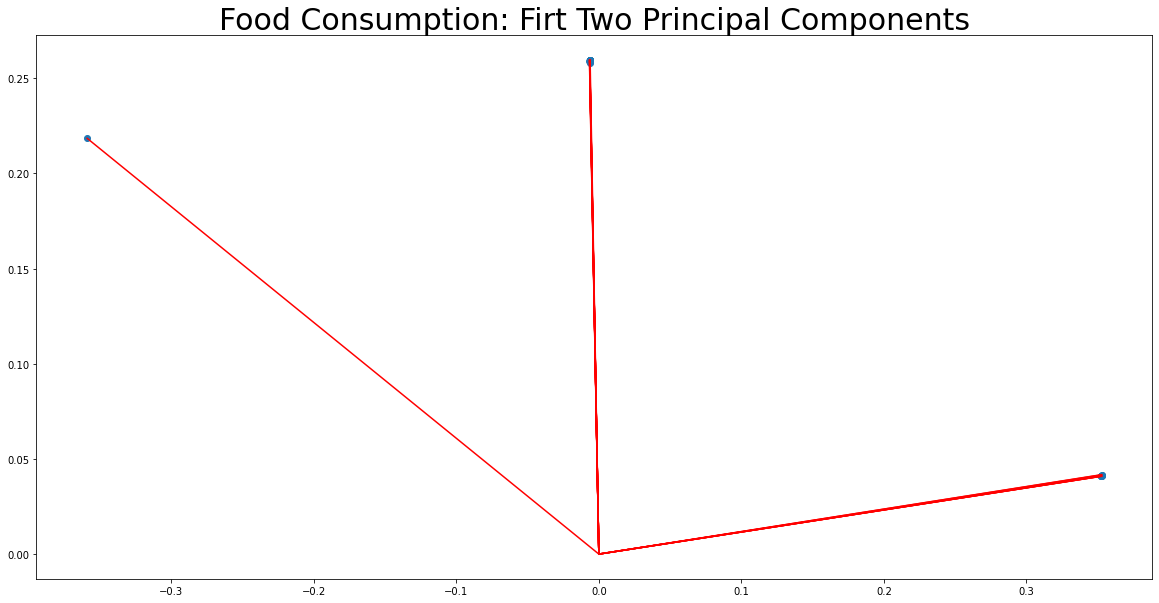

In [467]:
plt.figure(figsize=(20,10))
plt.title("Food Consumption: Firt Two Principal Components",fontsize=30)
for pcv in list(components):
    plt.plot([0,pcv[0]],[0,pcv[1]],'r')

plt.scatter(c_1,c_2)


In [468]:
pca_projections=PCA(food)[1]

Text(0, 0.5, 'Principal Component 2')

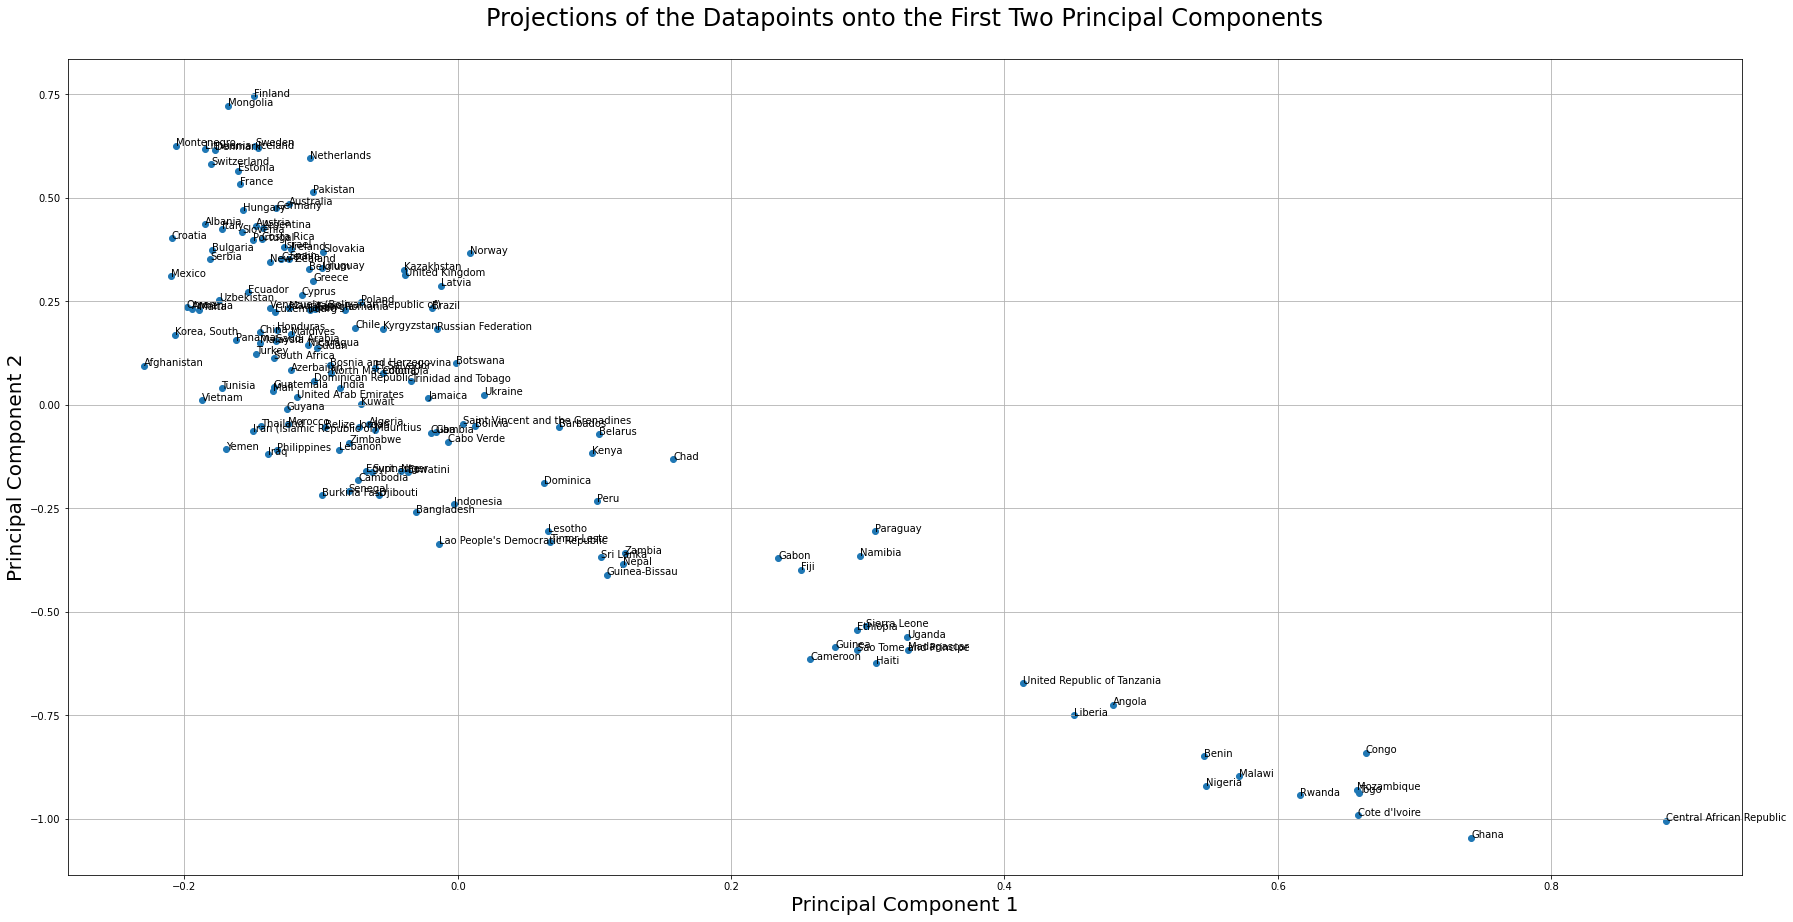

In [469]:
pca_1,pca_2=pca_projections.iloc[:,0],pca_projections.iloc[:,1]
plt.figure(figsize=(30,15))
plt.title("Projections of the Datapoints onto the First Two Principal Components\n",fontsize=24)
plt.grid("both")
plt.scatter(pca_1,pca_2)
for i,label in enumerate(food.index.tolist()):
    plt.annotate(label,(pca_1[i],pca_2[i]))
    
plt.xlabel('Principal Component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)

### <span style="color:blue"> comments)

The visualization of the graph tells us it seems to be proper for us not to partition the data since the majority of coutries conglomerated where the principal component 1 is less than 0.2. But we can not rush into the rush conclusion. Instead, we need strong evidence to support our guess. Let's run a silhouette analysis to see if we can be justied. 
   

In [470]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [471]:
score=dict()
for i in range(2,5):
    kmean=KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0).fit(food)
    labels=kmean.labels_
    cluster='label:K={}'.format(i)
    score[cluster]=silhouette_score(food,labels)


In [472]:
score

{'label:K=2': 0.3094442563858897,
 'label:K=3': 0.3334224901487333,
 'label:K=4': 0.29780418732139535}

Based on the score,we proceed to run a model baed on k=3

In [473]:
kmean=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit(food)
labels=kmean.labels_

In [474]:
food['label']=labels

Next we plot based on the cluster assignments that we obtained from K-Means clustering:

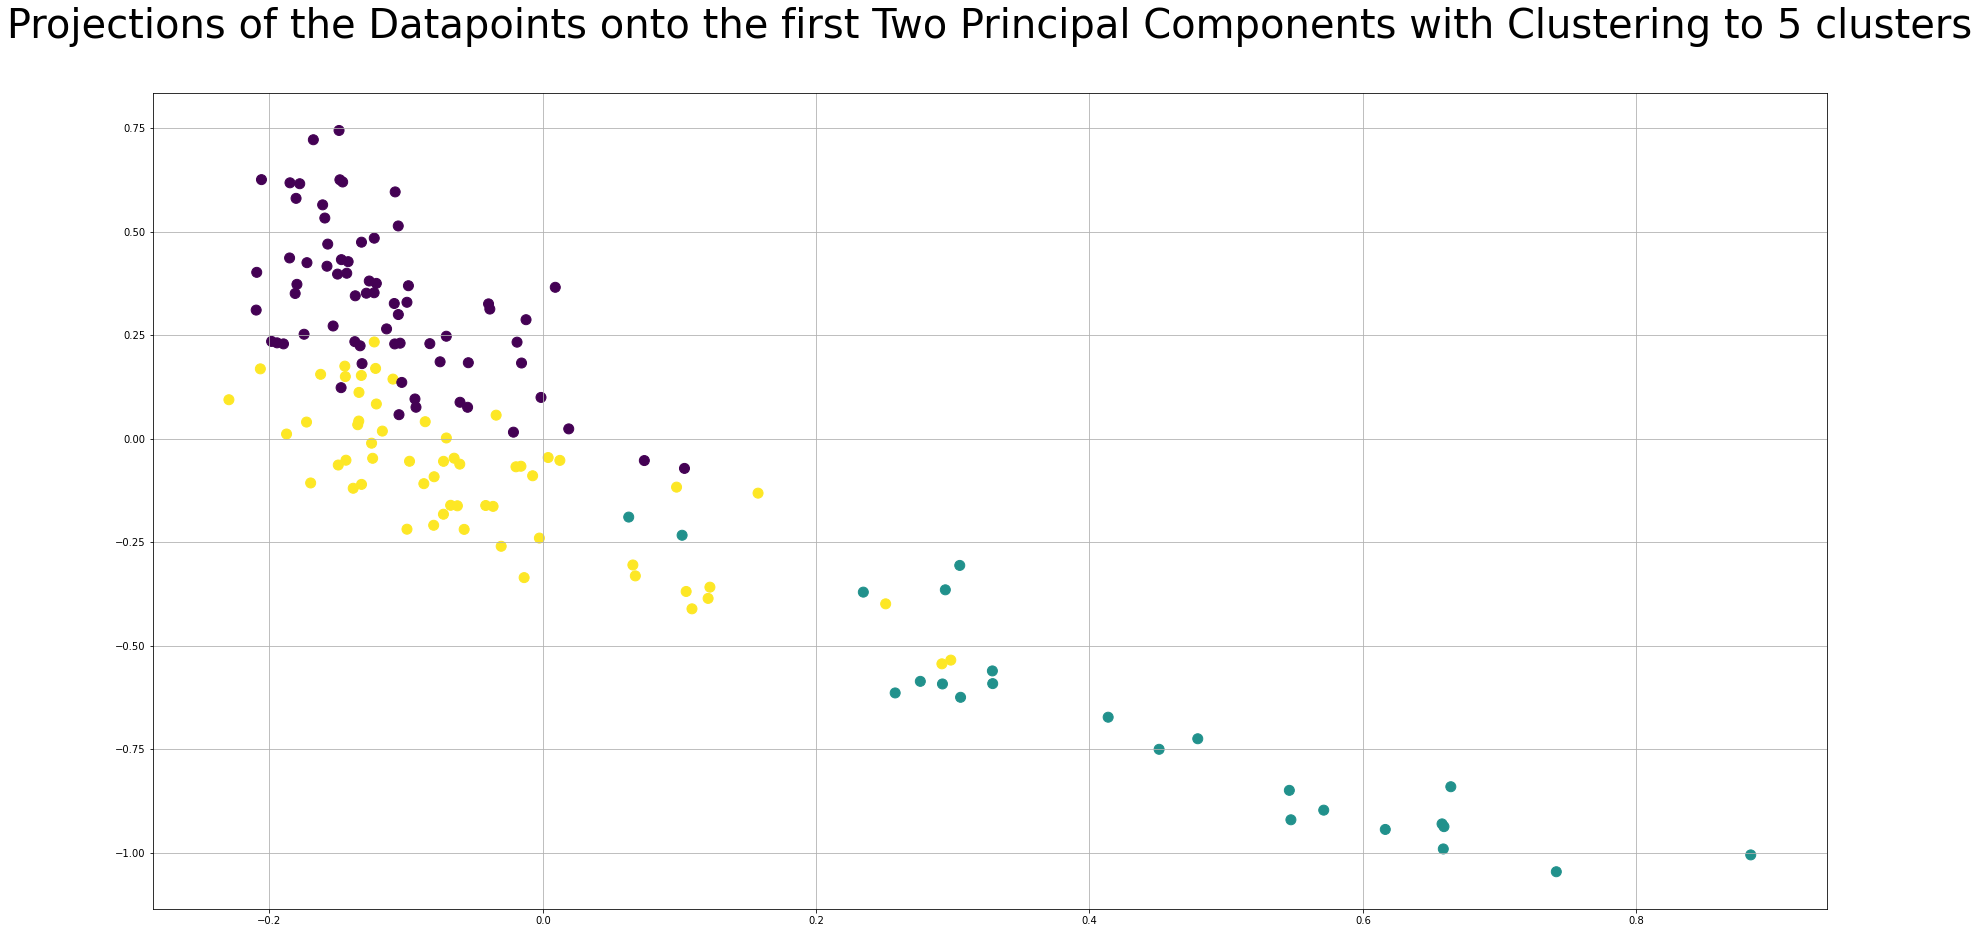

In [475]:
plt.figure(figsize=(30,15))
plt.title('Projections of the Datapoints onto the first Two Principal Components with Clustering to 5 clusters\n', fontsize=40)
plt.grid('both')
plt.scatter(pca_1,pca_2,c=food['label'],s=100)

### <span style="color:blue">comment


As expected, the lower silhouette score and poor performance on the clustering motivates us not to divide our dataset.  We should make an interesting guess if we divide the data into two based on the criterion, the first component value either less than or greater than 0.2. The whole is clustered into groups which coincide with the economic status, developing and developed country. But to gain the justification of our assumption, further research is asked for. 